### 梯度下降法 拟合 线性回归

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### y ~ 5x + 5

In [30]:
x = torch.Tensor([1.4, 5, 11, 16 ,21])
y = torch.Tensor([14.4, 29.6, 62, 85.5, 113.4])

#### 画散点图

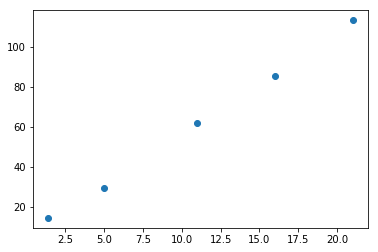

In [3]:
plt.scatter(x.numpy(), y.numpy())

In [31]:
x0 = torch.ones(x.size())
x0

tensor([1., 1., 1., 1., 1.])

In [32]:
X = torch.stack((x,x0),1)
X

tensor([[ 1.4000,  1.0000],
        [ 5.0000,  1.0000],
        [11.0000,  1.0000],
        [16.0000,  1.0000],
        [21.0000,  1.0000]])

In [33]:
w = torch.rand(2,requires_grad=True)
w

tensor([0.7960, 0.7806], requires_grad=True)

In [34]:
inputs = X
target = y

##### epoch: 训练的轮数
##### learning_rate: 学习率(决定梯度下降的快慢)
##### loss: 损失函数,  loss.backward(): 反向传播，求损失函数关于 w 的梯度向量
##### loss: 损失函数

In [35]:
def train(epochs=1, learning_rate=0.01):
    for epoch in range(epochs):
        output = inputs.mv(w)
        # 损失函数
        loss = (output - target).pow(2).sum()
        loss.backward()
        # 对参数更新
        w.data -= learning_rate * w.grad
        # 更新完后 清空 w.grad，否则 grad 值会持续累加
        w.grad.zero_()
        if epoch % 80 == 0:
            draw(output, loss)
    return w,loss

In [36]:
def draw(output, loss):
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(),output.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'loss=%s' % (loss.item()), fontdict={'size':20, 'color':'red'})
    plt.pause(0.005)

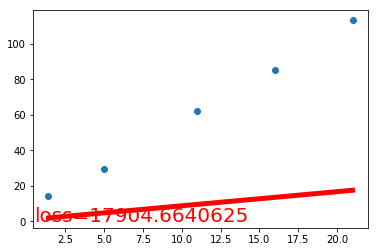

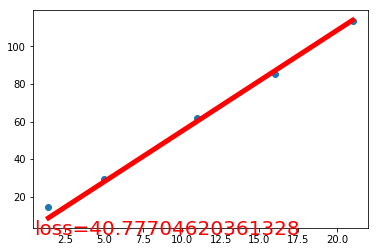

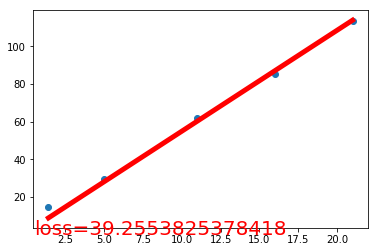

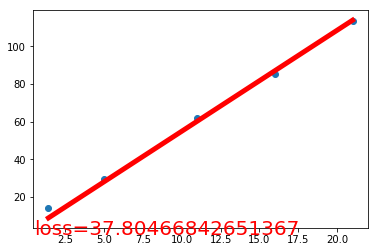

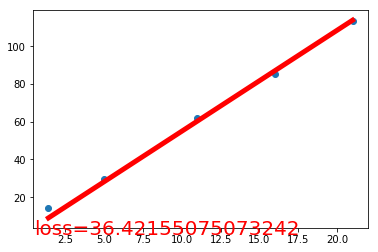

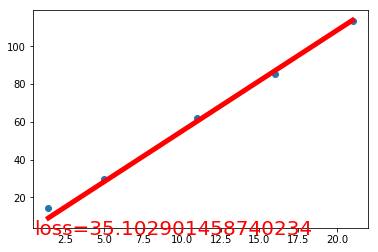

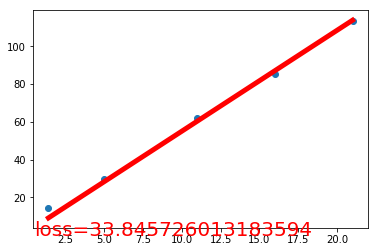

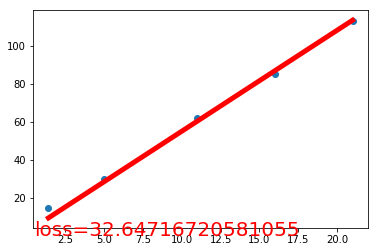

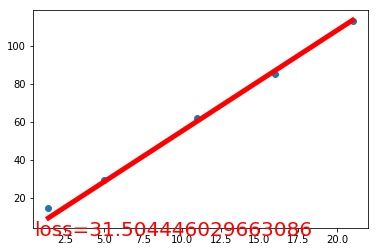

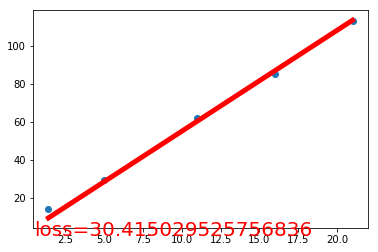

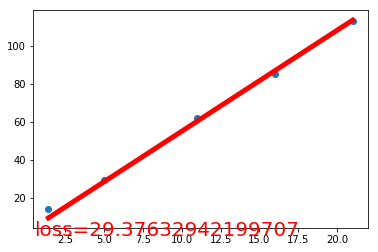

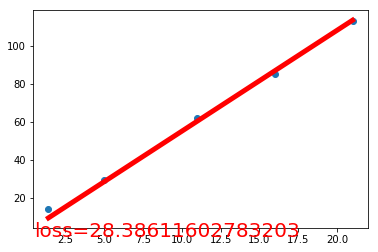

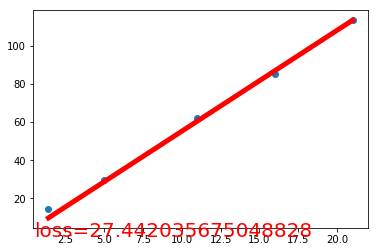

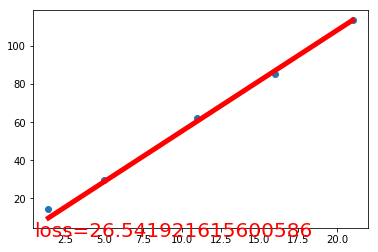

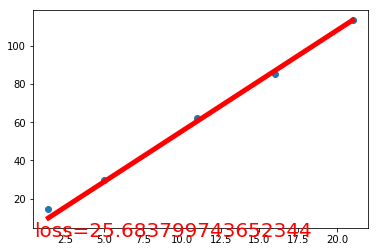

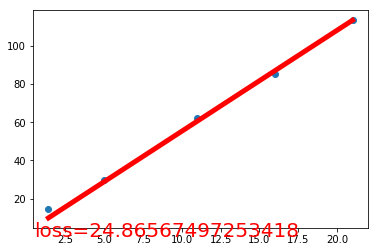

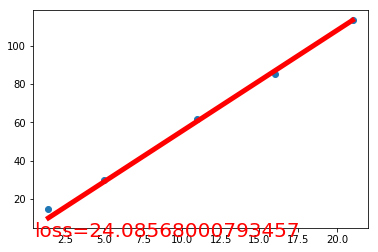

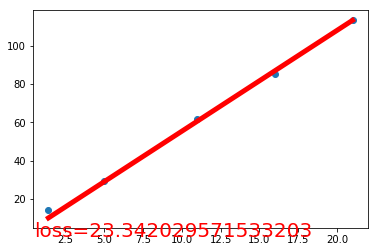

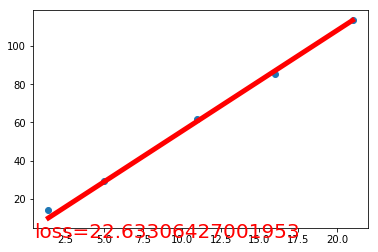

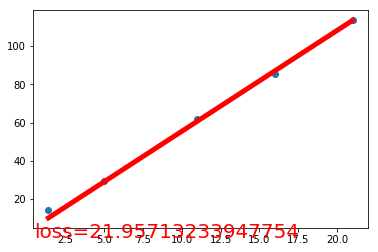

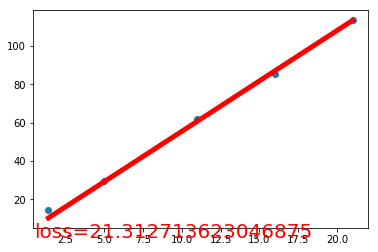

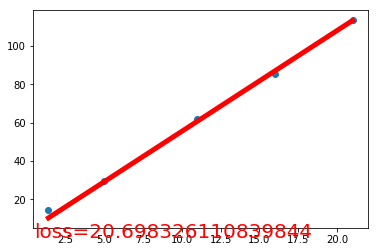

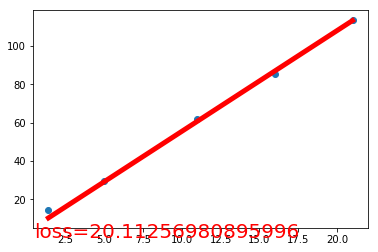

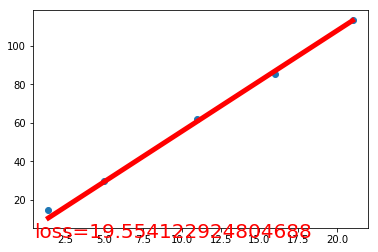

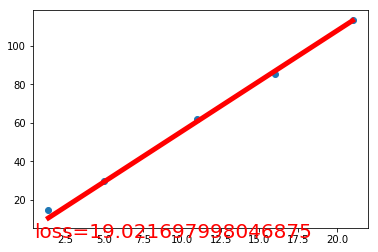

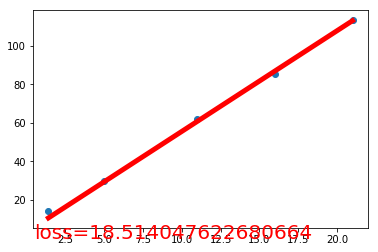

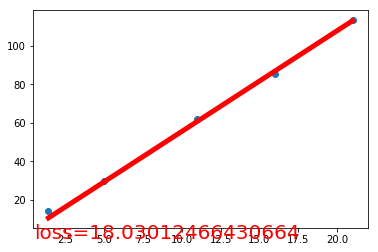

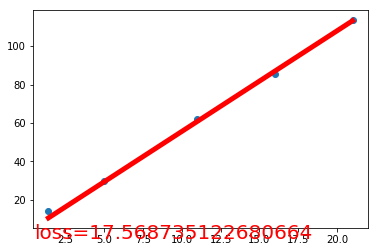

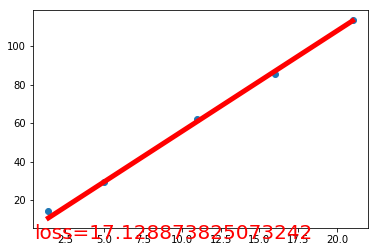

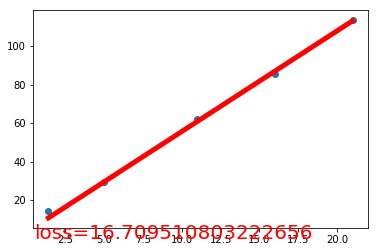

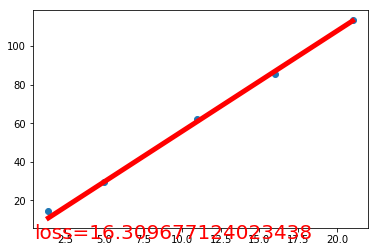

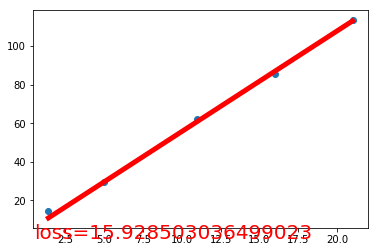

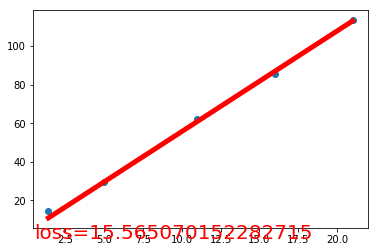

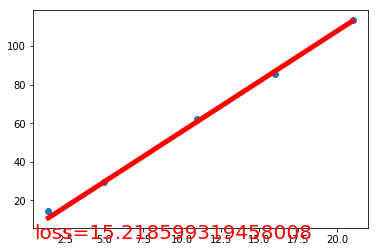

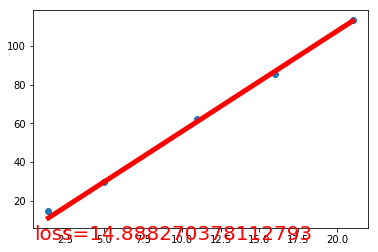

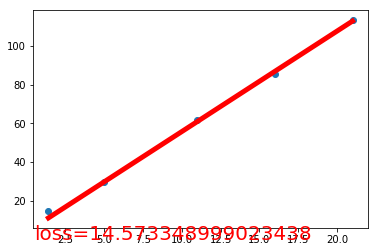

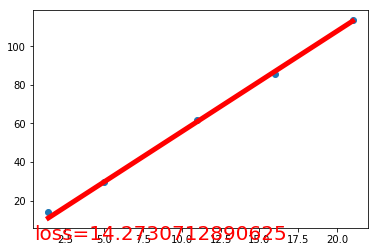

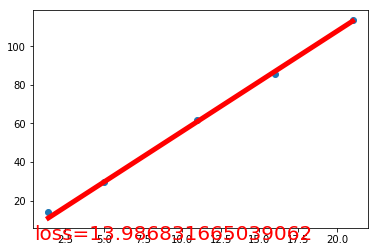

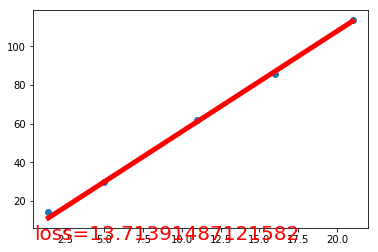

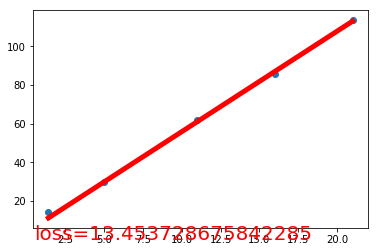

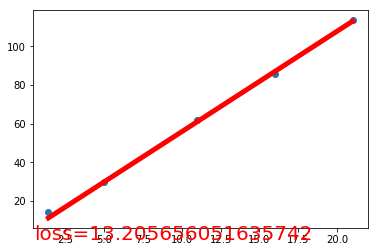

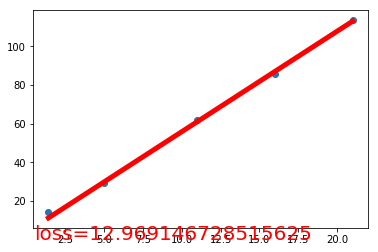

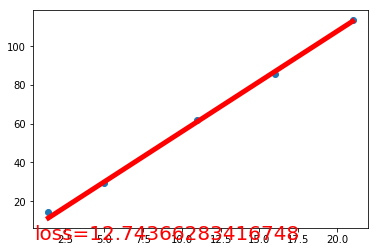

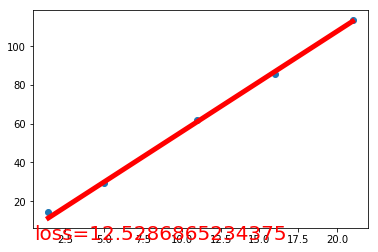

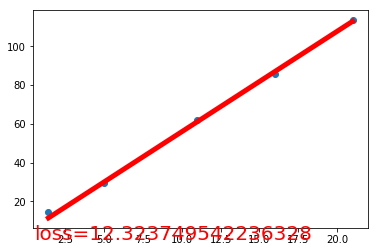

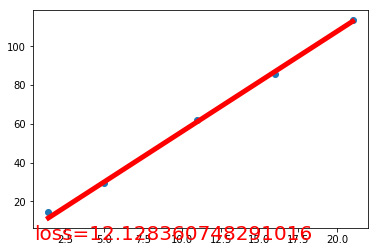

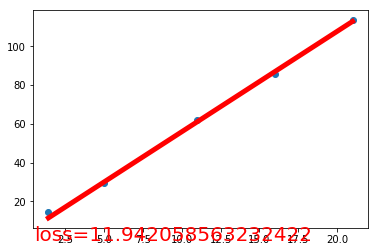

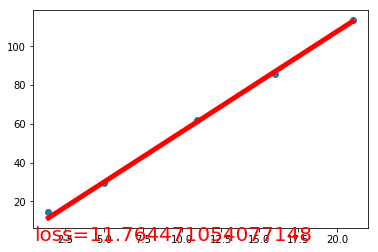

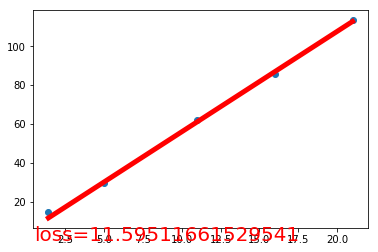

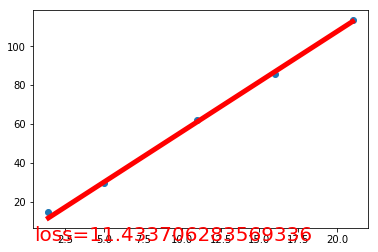

In [37]:
w,loss = train(4000,learning_rate=1e-4)

In [13]:
w.data

tensor([5.0839, 5.5856])

In [14]:
loss.item()

8.242461204528809

### 大规模数据实例

In [24]:
def produce_x(x):
    # 各元素为 1 的列，用于求截距
    x0 = torch.ones(x.numpy().size)
    X = torch.stack((x,x0),dim=1)
    return X

In [17]:
x = torch.linspace(-3, 3, 100000)
X = produce_x(x)
y = x + 1.2*torch.rand(x.size())

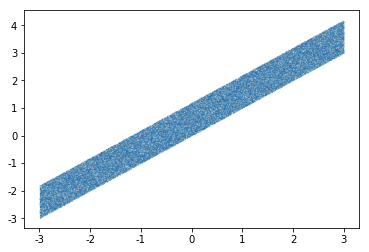

In [20]:
# s: 绘点的大小
plt.scatter(x.numpy(), y.numpy(), s=0.001)

In [21]:
inputs, target = X, y

In [22]:
def train(x, y, inputs, target, epochs=1, learning_rate=0.01):
    count_x = inputs.numpy().shape[0]
    w = torch.rand(inputs.numpy().shape[1])
    w.requires_grad = True
    for epoch in range(epochs):
        output = inputs.mv(w)
        loss = (output - target).pow(2).sum() / count_x
        loss.backward()
        w.data -= learning_rate * w.grad
        w.grad.zero_()
        
        if epoch % 80 == 0:
            draw(x, y, output, loss)
    return w, loss

def draw(x, y, output, loss):
    plt.cla()
    plt.scatter(x.numpy(), y.numpy())
    plt.plot(x.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%s' % (loss.item()), fontdict={'size':20, 'color':'red'})
    plt.pause(0.005)

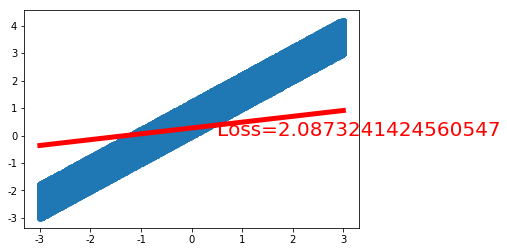

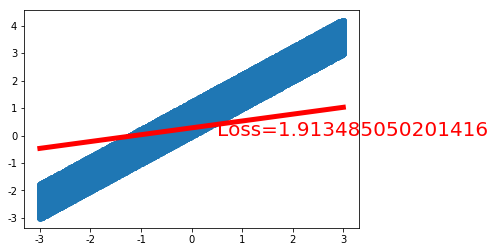

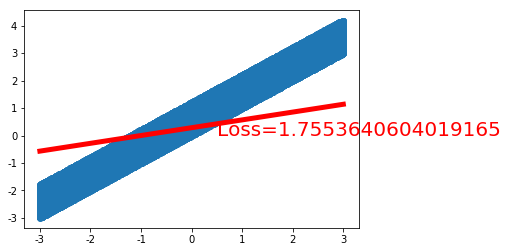

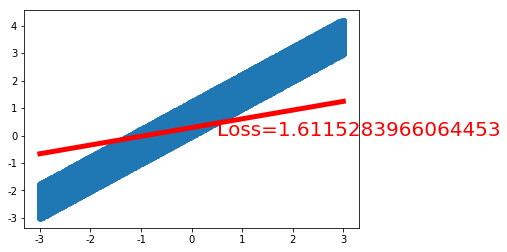

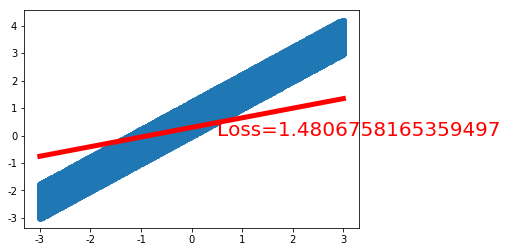

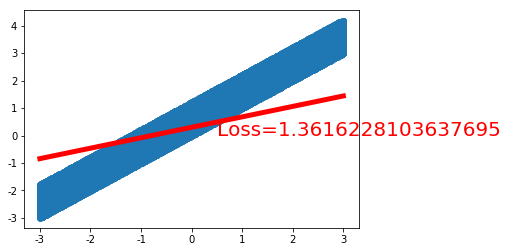

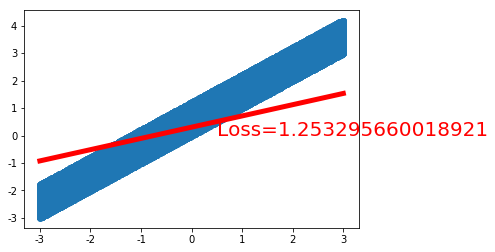

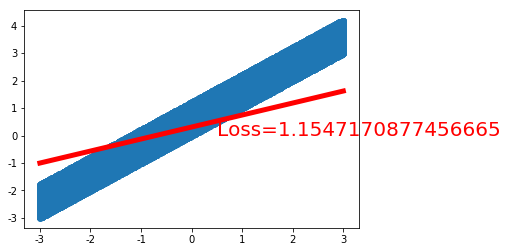

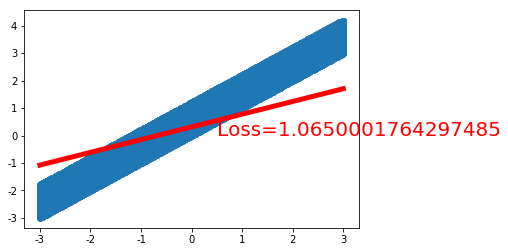

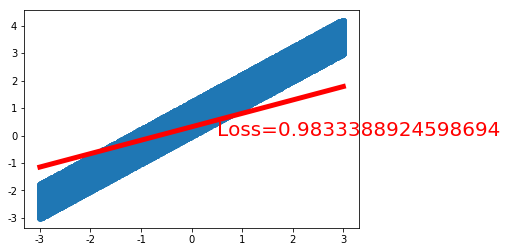

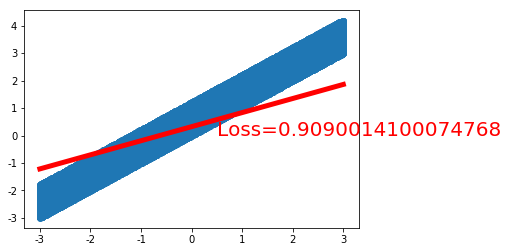

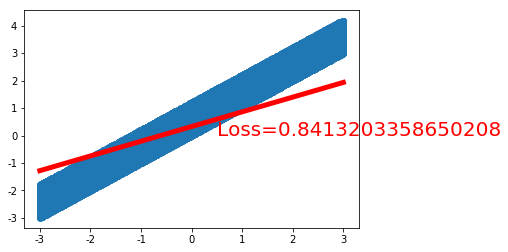

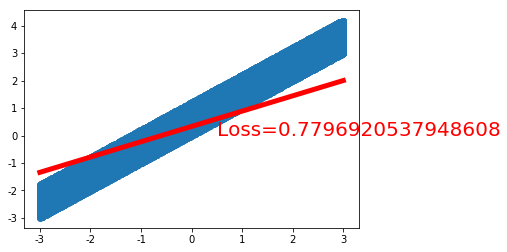

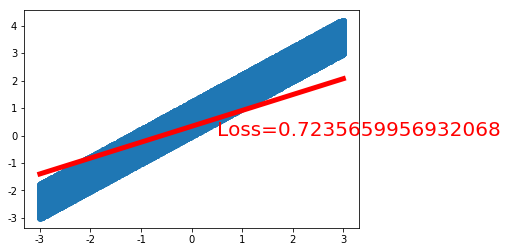

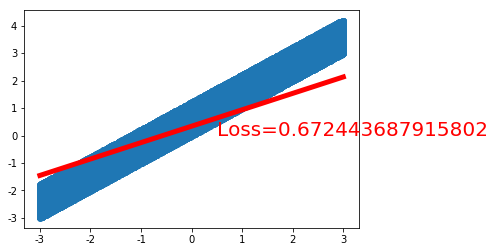

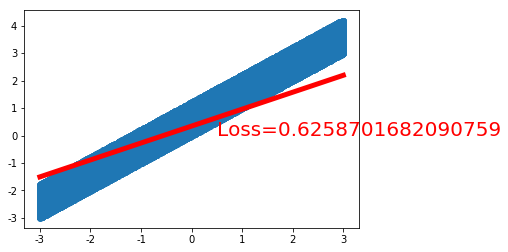

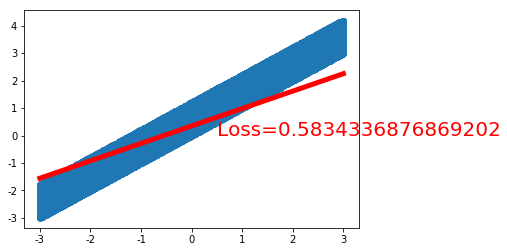

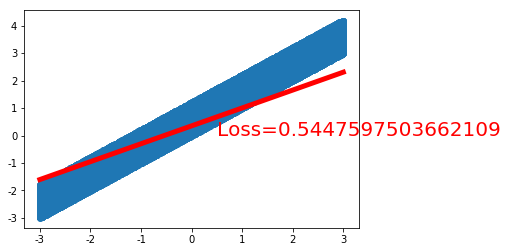

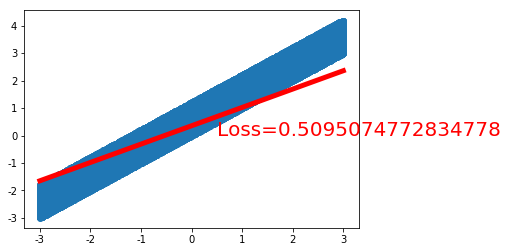

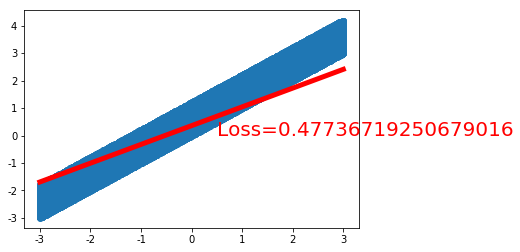

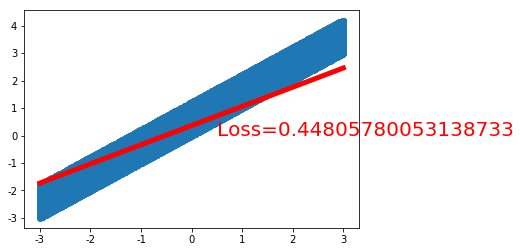

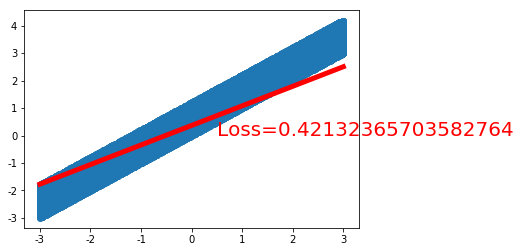

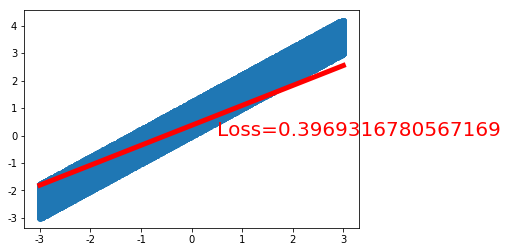

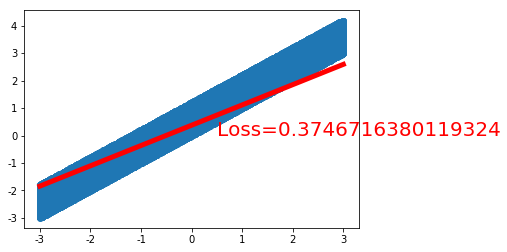

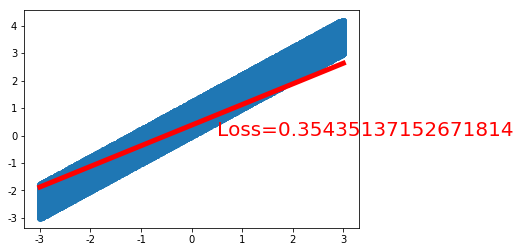

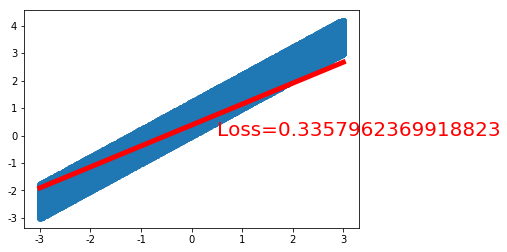

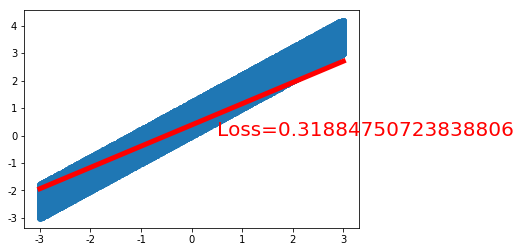

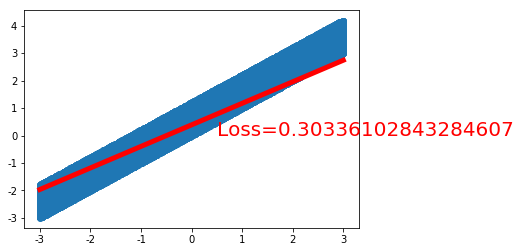

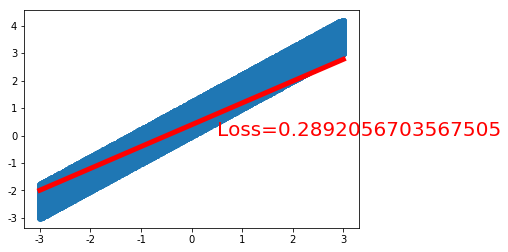

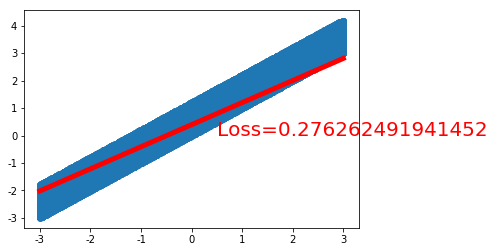

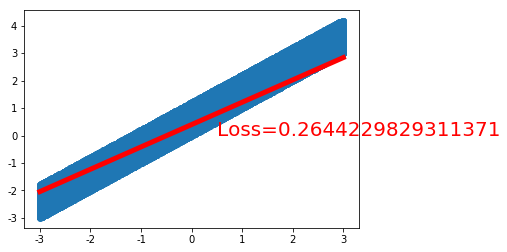

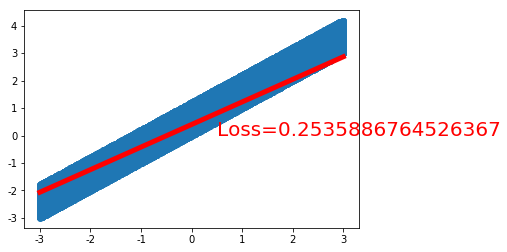

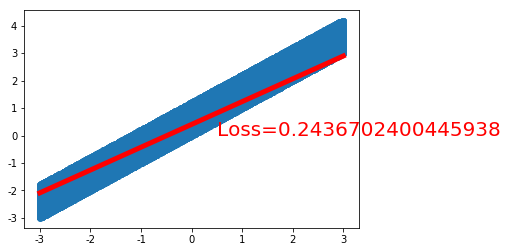

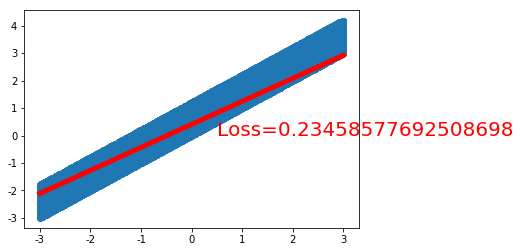

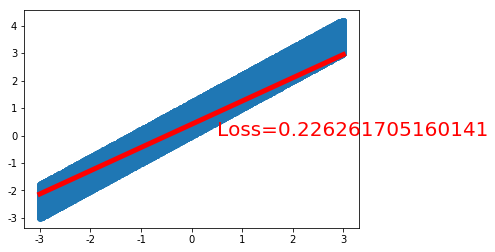

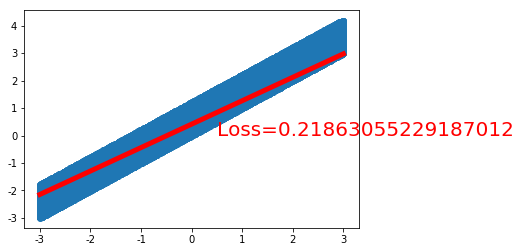

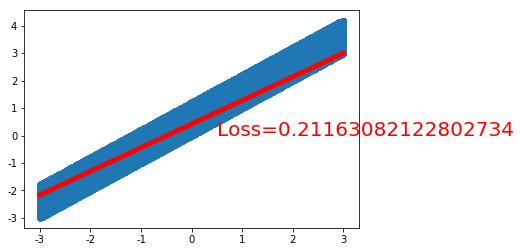

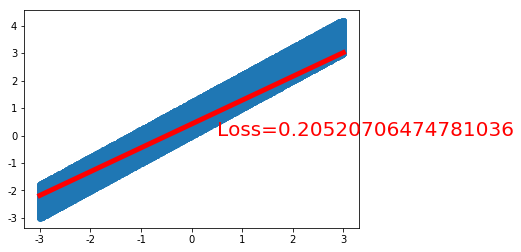

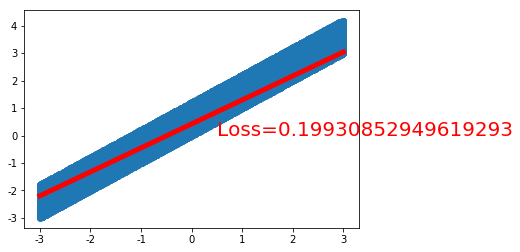

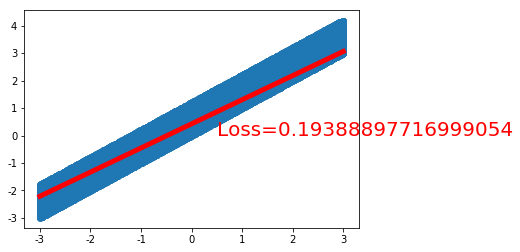

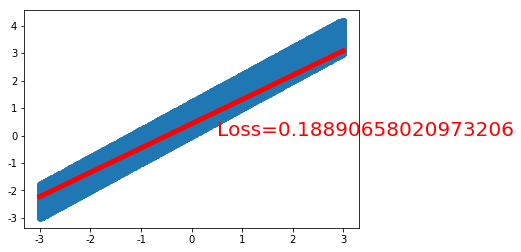

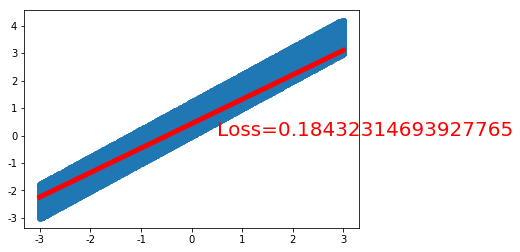

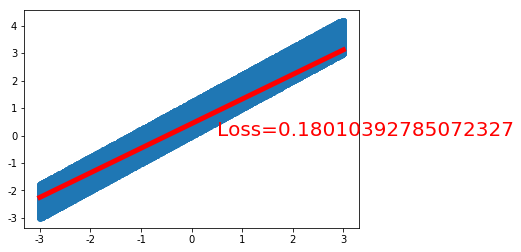

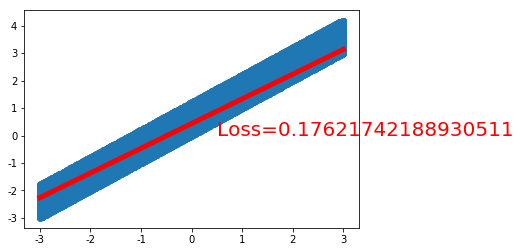

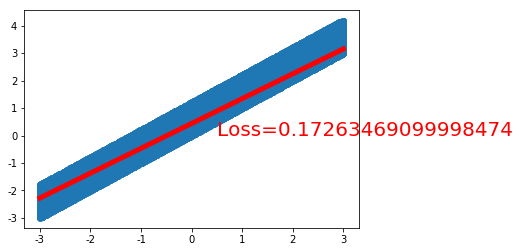

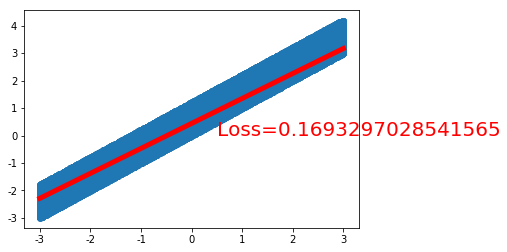

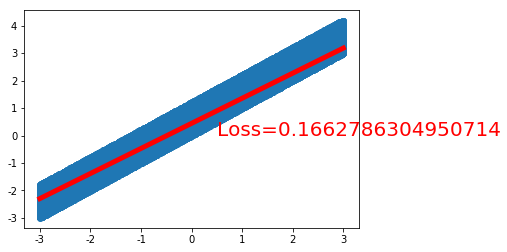

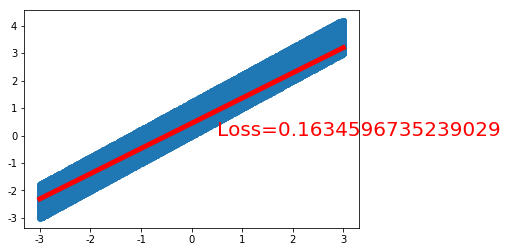

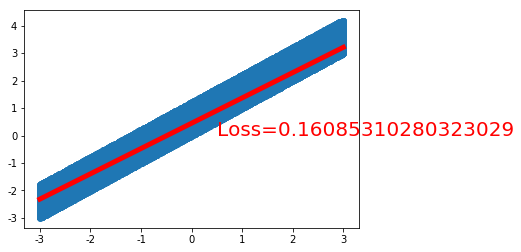

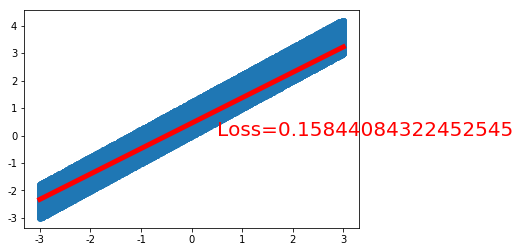

In [27]:
w, loss = train(x, y, inputs, target, epochs=4000, learning_rate=1e-4)

In [38]:
w, loss

(tensor([5.1599, 4.4076], requires_grad=True),
 tensor(11.2817, grad_fn=<SumBackward0>))